# Contour Plotting

This notebook demonstrates reading and plotting gridded data including model output.
The following code will contour around every grid point and does this without
"thinking". So, don't worry if not all contours are as smooth as you
would like. We'll discuss how to smooth the data in future chapters.

## Import Packages

Here we bring in the needed Python modules to be able to plot contours using the computer. Note that there are fewer needed for this particular plotting scenario.

In [2]:
from datetime import datetime, timedelta, time

from metpy.plots import declarative
from metpy.units import units
import xarray as xr

## Get Data

Here we are using current data to demonstrate contour plotting. If you have a different data source you would like to use, simply change out the call to remote data in the `open_dataset` function to be appropriate for the local or remote data you would like to access. Future chapters will demonstrate different data sources that can be commonly used. Here we'll use the GFS data from the Unidata THREDDS server.

In [3]:
# Set the date/time of the model run
# The following code will get you yesterday at 12 UTC
yesterday = datetime.utcnow() - timedelta(days=1)
model_run_date = datetime.combine(yesterday, time(12))

# Remote access to the dataset from the UCAR site
ds = xr.open_dataset('https://thredds.ucar.edu/thredds/dodsC/grib'
                     f'/NCEP/GFS/Global_onedeg/GFS_Global_onedeg_'
                     f'{model_run_date:%Y%m%d}_{model_run_date:%H%M}.grib2')

# Subset data to be just over the U.S. for plotting purposes
ds = ds.sel(lat=slice(70,10), lon=slice(360-140, 360-60))

### Plot Data

Here we demonstrate the use of [`ContourPlot()`](../../appendix/metpy_declarative_contourplot.md) for having the computer draw contours of a variable. Only a small subset of atttributes are used in this example, but your plot can be further customized using a host of different attributes, which you can read about in the MetPy documentation.

<a href="https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.ContourPlot.html" target="_blank">MetPy `ContourPlot()` Documentation</a>

/Users/kgoebber/miniconda3/envs/metpy_book/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/kgoebber/miniconda3/envs/metpy_book/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


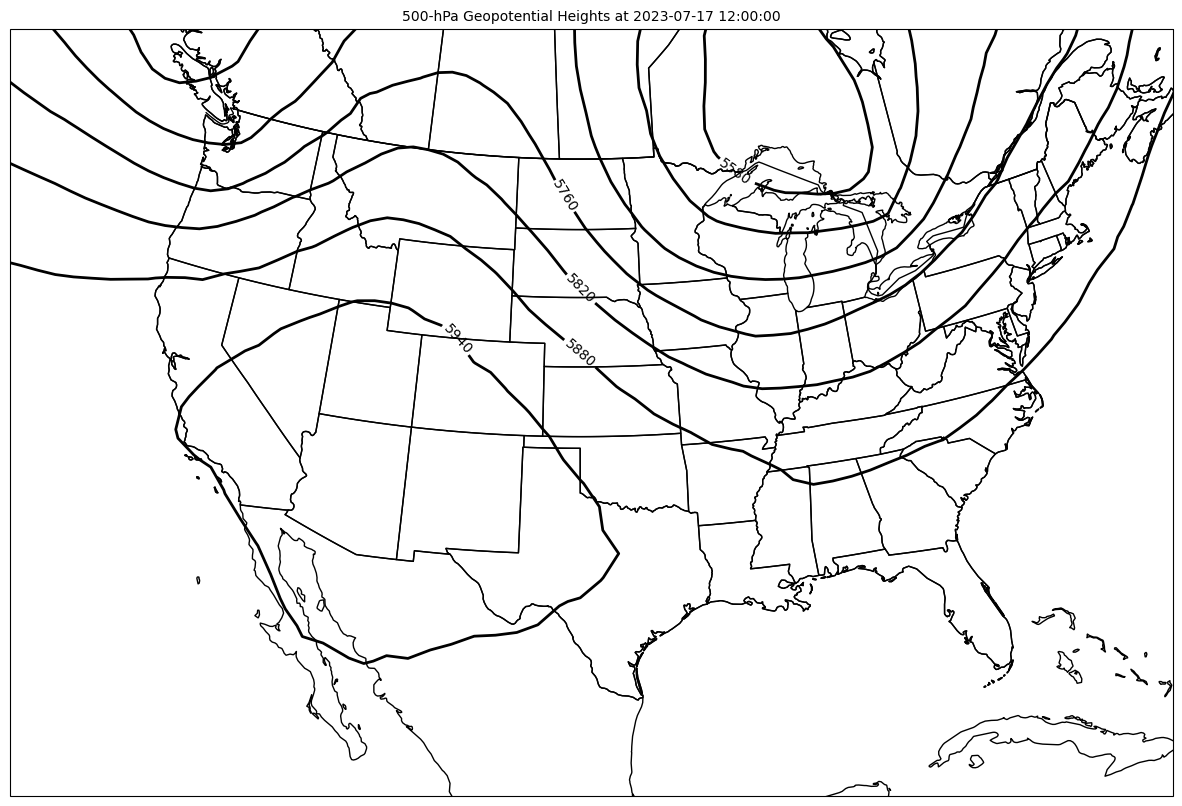

In [4]:
# Set the plot time with forecast hours
plot_time = model_run_date + timedelta(hours=0)

# Set attributes for plotting contours
cntr = declarative.ContourPlot()
cntr.data = ds
cntr.field = 'Geopotential_height_isobaric'
cntr.level = 500 * units.hPa
cntr.time = plot_time
cntr.contours = range(0, 10000, 60)
cntr.clabels = True

# Set the attributes for the map
# and put the contours on the map
panel = declarative.MapPanel()
panel.area = [-125, -74, 22, 52]
panel.projection = 'lcc'
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'500-hPa Geopotential Heights at {plot_time}'
panel.plots = [cntr]

# Set the attributes for the panel
# and put the panel in the figure
pc = declarative.PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]

# Show the figure
pc.show()